In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#importing data  from csv  file to pandas dataframe
car_data = pd.read_csv("C:\\Users\\Acer\\Documents\\car data.csv")

In [3]:
#this .head() function will print us the first 5 rows of the data
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#this will give us how many rows and coloums we have in the car_data
car_data.shape

(301, 9)

In [5]:
# this .info() function will be getting us some info about the car_data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking the number of missing values of car_data
#.isnull().sum() will tell us that
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of categorical data

print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# We need to encode this categorical data... As we can see that there are texts like petrol diesel manual dealer .... But the machine cannot understand texts...... So we need to change this to some numerical value like 0,1...

In [8]:
#encoding the Fuel_Type coloum
car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}},inplace = True)

#encoding the Seller_Type coloum
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}},inplace = True)

#encoding the Transmission column
car_data.replace({'Transmission':{'Manual': 0, 'Automatic': 1}},inplace = True)

In [9]:
# Again checking the distribution of categorical data after encoding

print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting our data into Target 

In [11]:
# The car name and the selling price is not necessary for our model to predict the price... So we'll be dropping those coloums..

X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1) 
# whenever droping a coloum, axis will be 1... and whenever dropping a row, axis will be 0

Y = car_data['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Testing and Training data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

#here test_size = 0.1 means that out of the total data, 10% will be used as testing specimen 
#and rest 90% will be used to train the model

MODEL TRAININNG....

Linear Regression Model

In [15]:
#loading the linear regression model
#This is how we load a particular model to a variable

linear_regression_model = LinearRegression()

In [16]:
#Now we can fit our data to the Linear Regression ....
#The data here is X_train and the respective values are the Y_train....
#So we need to fid this model with X_train and Y_train....

#This .fit() function is necessary to fit the data to the model....
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION....

In [17]:
# prediction on training data

training_data_prediction = linear_regression_model.predict(X_train)

In [18]:
# R squared error

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("The error is: ", error_score)

The error is:  0.8799451660493698


Visualising the actual prices and predicted prices....

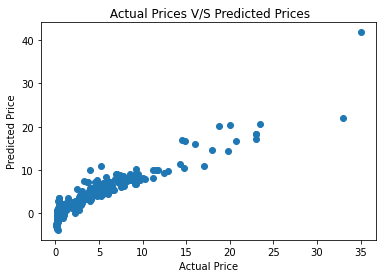

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices V/S Predicted Prices")
plt.show()

In [20]:
# prediction on testing data

test_data_prediction = linear_regression_model.predict(X_test)

In [21]:
error_score_2 = metrics.r2_score(Y_test, test_data_prediction)
print("The error is: ", error_score_2)

The error is:  0.8365766715026905


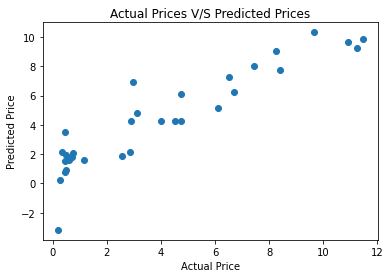

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices V/S Predicted Prices")
plt.show()

# Lasso Regression...

In [23]:
#loading the linear regression model
#This is how we load a particular model to a variable

lasso_model = Lasso()

In [24]:
#Now we can fit our data to the Linear Regression ....
#The data here is X_train and the respective values are the Y_train....
#So we need to fid this model with X_train and Y_train....

#This .fit() function is necessary to fit the data to the model....
lasso_model.fit(X_train, Y_train)

Lasso()

MODEL EVALUATION....

In [25]:
# prediction on training data

training_data_prediction = lasso_model.predict(X_train)

In [26]:
# R squared error

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("The error is: ", error_score)

The error is:  0.8427856123435794


Visualising the actual prices and predicted prices....

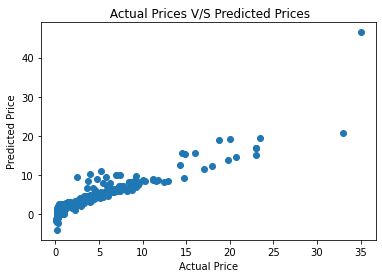

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices V/S Predicted Prices")
plt.show()

In [28]:
# prediction on testing data

test_data_prediction = lasso_model.predict(X_test)

In [29]:
error_score_2 = metrics.r2_score(Y_test, test_data_prediction)
print("The error is: ", error_score_2)

The error is:  0.8709167941173195


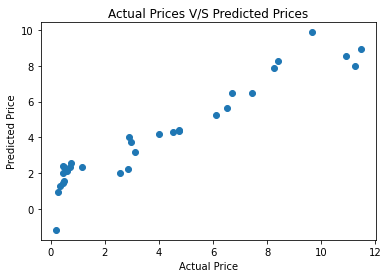

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices V/S Predicted Prices")
plt.show()